In [517]:
# step 1: import the libraries and upload the dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
#below is a new package needed for this lab
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

import os

os.chdir("/Users/lucaslisman/Desktop/DS J-Term/")
import seaborn as sns

In [518]:
# open the dataset.csv file 
accidents = pd.read_csv('cville_accidents.csv')
# inspect the types of each column
accidents.dtypes
accidents.head()

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance.mi.,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,31910,A-31910,2,2016-12-01 12:19:37,2016-12-01 18:19:37,38.175522,-78.407423,38.164358,-78.414532,0.863,...,False,False,False,False,False,False,Day,Day,Day,Day
1,32851,A-32851,3,2016-12-05 09:25:43,2016-12-05 15:25:43,38.123890,-78.444780,38.123919,-78.444748,0.003,...,False,False,False,False,False,False,Day,Day,Day,Day
2,33648,A-33648,2,2016-12-07 07:33:53,2016-12-07 13:33:53,38.170954,-78.410337,38.163851,-78.414851,0.549,...,False,False,False,False,False,False,Day,Day,Day,Day
3,33670,A-33670,2,2016-12-07 07:49:21,2016-12-07 14:04:50,38.173332,-78.408818,38.163883,-78.414830,0.730,...,False,False,False,False,False,False,Day,Day,Day,Day
4,33689,A-33689,2,2016-12-07 08:37:45,2016-12-07 14:37:45,38.034930,-78.606930,38.032470,-78.598830,0.472,...,False,False,False,False,False,False,Day,Day,Day,Day


In [519]:
# check how many nas 
accidents.isna().sum()
# not too many nas, so we can drop them 
accidents = accidents.dropna()
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 87 to 2039
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             875 non-null    int64  
 1   ID                     875 non-null    object 
 2   Severity               875 non-null    int64  
 3   Start_Time             875 non-null    object 
 4   End_Time               875 non-null    object 
 5   Start_Lat              875 non-null    float64
 6   Start_Lng              875 non-null    float64
 7   End_Lat                875 non-null    float64
 8   End_Lng                875 non-null    float64
 9   Distance.mi.           875 non-null    float64
 10  Description            875 non-null    object 
 11  Number                 875 non-null    float64
 12  Street                 875 non-null    object 
 13  Side                   875 non-null    object 
 14  City                   875 non-null    object 
 15  Coun

In [520]:
accidents = accidents.drop(["Unnamed: 0","Start_Lat","Start_Lng", "End_Lat","End_Lng","ID","Start_Time","End_Time","Street", "City", "County", "Zipcode","Weather_Timestamp","Description", "Number","State","Country","Airport_Code","Timezone","Amenity","Bump","Give_Way","No_Exit","Railway","Roundabout","Station","Traffic_Calming","Turning_Loop"],axis=1)

In [521]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 87 to 2039
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Severity               875 non-null    int64  
 1   Distance.mi.           875 non-null    float64
 2   Side                   875 non-null    object 
 3   Temperature.F.         875 non-null    float64
 4   Wind_Chill.F.          875 non-null    float64
 5   Humidity...            875 non-null    float64
 6   Pressure.in.           875 non-null    float64
 7   Visibility.mi.         875 non-null    float64
 8   Wind_Direction         875 non-null    object 
 9   Wind_Speed.mph.        875 non-null    float64
 10  Precipitation.in.      875 non-null    float64
 11  Weather_Condition      875 non-null    object 
 12  Crossing               875 non-null    bool   
 13  Junction               875 non-null    bool   
 14  Stop                   875 non-null    bool   
 15  Traf

In [522]:
#### Make variables categorical
accidents['Side'] = accidents['Side'].astype("category")

accidents['Wind_Direction'] = accidents['Wind_Direction'].astype("category")

accidents['Weather_Condition'] = accidents['Weather_Condition'].astype("category")

accidents['Crossing'] = accidents['Crossing'].astype("category")

accidents['Junction'] = accidents['Junction'].astype("category")

accidents['Traffic_Signal'] = accidents['Traffic_Signal'].astype("category")

accidents['Sunrise_Sunset'] = accidents['Sunrise_Sunset'].astype("category")

accidents['Civil_Twilight'] = accidents['Civil_Twilight'].astype("category")

accidents['Nautical_Twilight'] = accidents['Nautical_Twilight'].astype("category")

accidents['Astronomical_Twilight'] = accidents['Astronomical_Twilight'].astype("category")

accidents['Stop'] = accidents['Stop'].astype("category")



In [523]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 87 to 2039
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Severity               875 non-null    int64   
 1   Distance.mi.           875 non-null    float64 
 2   Side                   875 non-null    category
 3   Temperature.F.         875 non-null    float64 
 4   Wind_Chill.F.          875 non-null    float64 
 5   Humidity...            875 non-null    float64 
 6   Pressure.in.           875 non-null    float64 
 7   Visibility.mi.         875 non-null    float64 
 8   Wind_Direction         875 non-null    category
 9   Wind_Speed.mph.        875 non-null    float64 
 10  Precipitation.in.      875 non-null    float64 
 11  Weather_Condition      875 non-null    category
 12  Crossing               875 non-null    category
 13  Junction               875 non-null    category
 14  Stop                   875 non-null    c

In [524]:
accidents2 = accidents.drop(["Weather_Condition", "Wind_Direction", "Stop", "Junction"],axis = 1)

In [525]:
accidents2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 87 to 2039
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Severity               875 non-null    int64   
 1   Distance.mi.           875 non-null    float64 
 2   Side                   875 non-null    category
 3   Temperature.F.         875 non-null    float64 
 4   Wind_Chill.F.          875 non-null    float64 
 5   Humidity...            875 non-null    float64 
 6   Pressure.in.           875 non-null    float64 
 7   Visibility.mi.         875 non-null    float64 
 8   Wind_Speed.mph.        875 non-null    float64 
 9   Precipitation.in.      875 non-null    float64 
 10  Crossing               875 non-null    category
 11  Traffic_Signal         875 non-null    category
 12  Sunrise_Sunset         875 non-null    category
 13  Civil_Twilight         875 non-null    category
 14  Nautical_Twilight      875 non-null    c

In [526]:
accidents2["Distance"] = accidents2["Distance.mi."]

In [527]:
accidents2 = accidents2.drop(["Distance.mi."], axis = 1)

In [528]:
accidents.head()

,Severity,Distance.mi.,Side,Temperature.F.,Wind_Chill.F.,Humidity...,Pressure.in.,Visibility.mi.,Wind_Direction,Wind_Speed.mph.,Precipitation.in.,Weather_Condition,Crossing,Junction,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
87,2,0.078,R,60.0,60.0,93.0,28.82,2.0,N,3.0,0.09,Rain,False,False,False,False,Day,Day,Day,Day
88,2,0.028,L,80.0,80.0,45.0,29.42,10.0,E,9.0,0.00,Fair,False,False,False,False,Day,Day,Day,Day
89,4,0.047,L,84.0,84.0,44.0,29.33,10.0,S,7.0,0.00,Fair,False,False,False,False,Day,Day,Day,Day
90,2,0.105,R,51.0,51.0,22.0,29.60,10.0,CALM,0.0,0.00,Fair,False,False,False,False,Day,Day,Day,Day
94,2,0.175,R,89.0,89.0,50.0,29.29,10.0,VAR,3.0,0.00,Fair,False,False,False,True,Day,Day,Day,Day


/var/folders/gz/7h0l2_4j6fld7vp7x2k94bhr0000gn/T/ipykernel_32489/4077005793.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr =accidents.corr()


<Axes: >

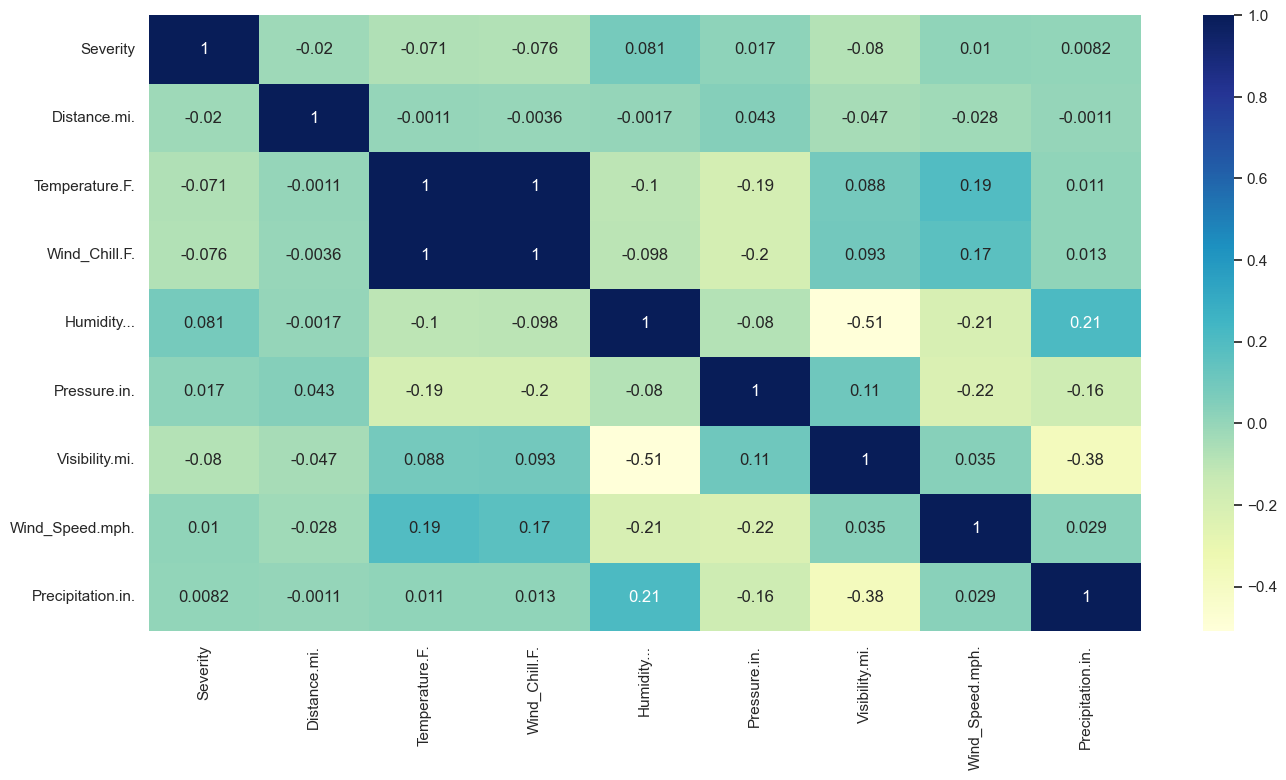

In [529]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr =accidents.corr()
sns.heatmap(corr,annot=True, cmap="YlGnBu")

                                 Numeric Features Distribution                                  


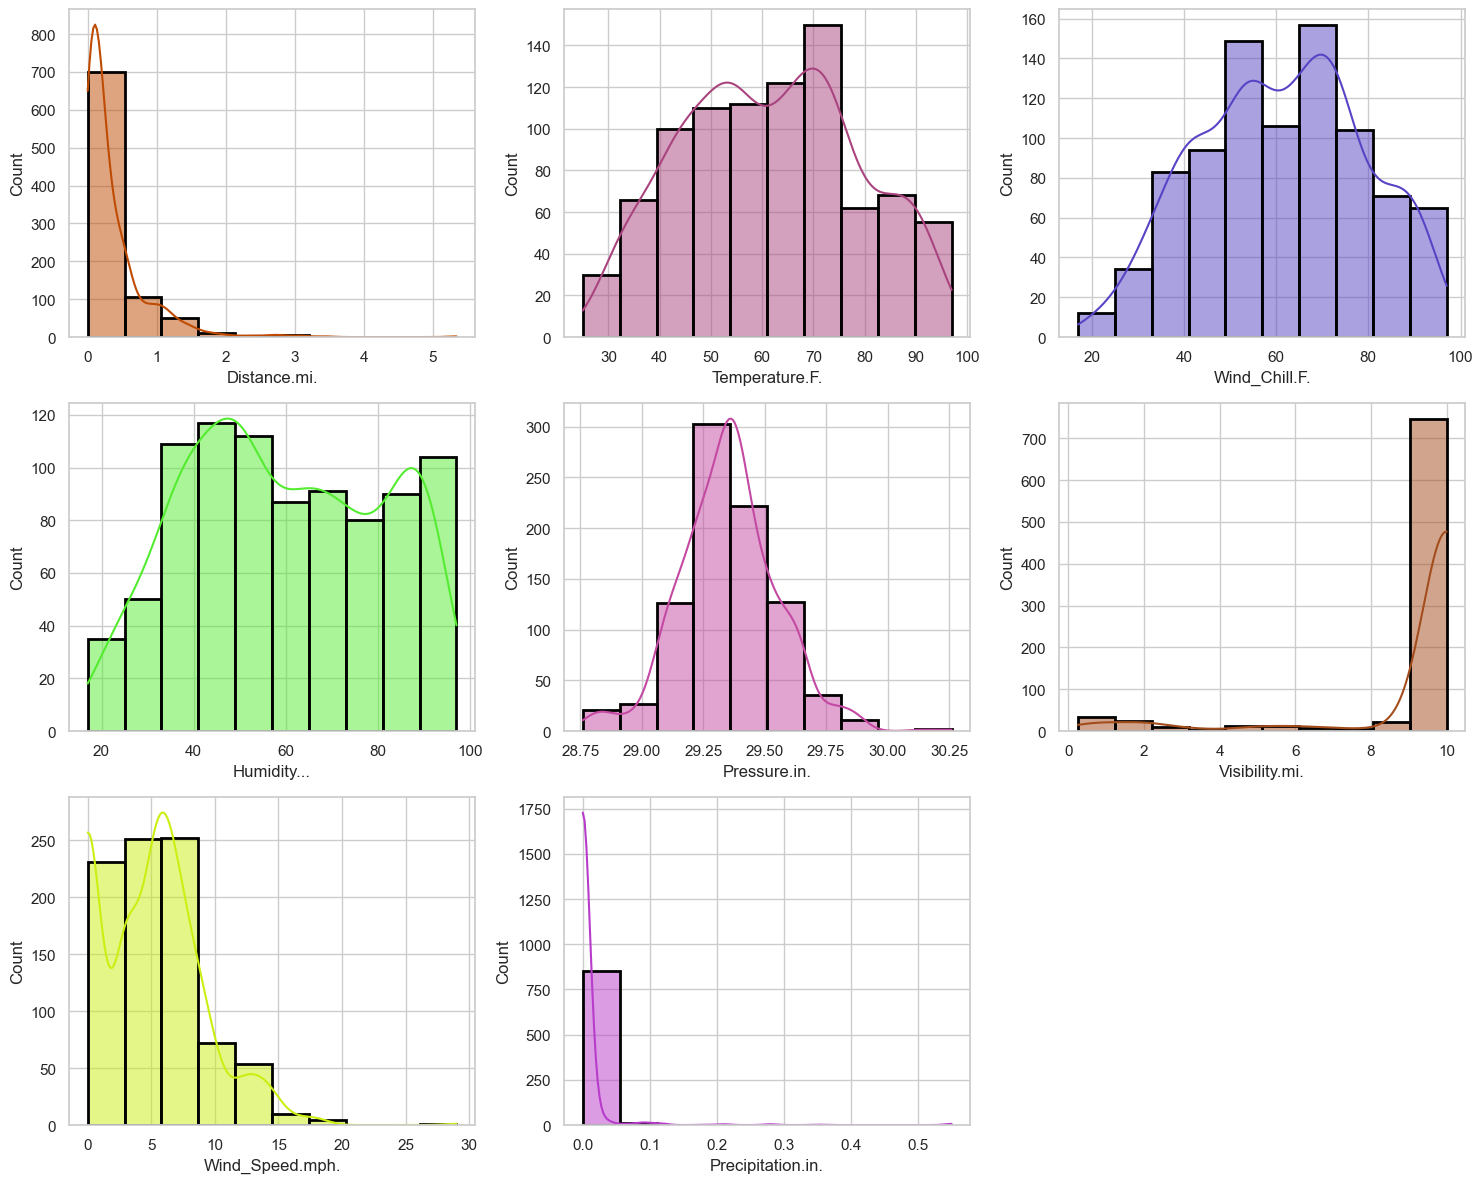

In [530]:
import math


target_column = 'Severity'
numerical_features = accidents.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop(target_column)


print('\033[1mNumeric Features Distribution'.center(100))

# Define number of subplots per row
subplots_per_row = 3
num_rows = math.ceil(len(numerical_features) / subplots_per_row)

plt.figure(figsize=[15, 4 * num_rows])

for i, feature in enumerate(numerical_features):
    plt.subplot(num_rows, subplots_per_row, i + 1)
    sns.histplot(
        accidents[feature],
        kde=True,  # Add a kernel density estimate
        color=list(np.random.randint([255, 255, 255]) / 255),
        edgecolor="black", 
        linewidth=2,
        bins=10
    )

plt.tight_layout()
plt.show()


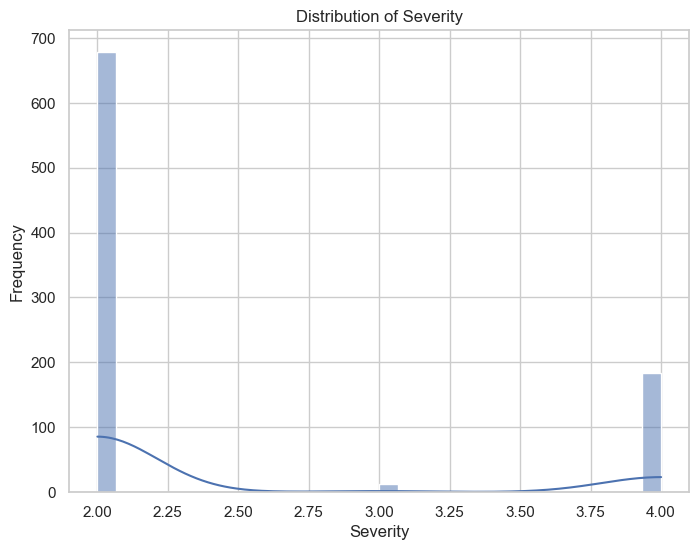

In [531]:
plt.figure(figsize=(8, 6))
sns.histplot(accidents["Severity"], bins=30, kde=True)
plt.title("Distribution of Severity")
plt.xlabel("Severity")
plt.ylabel("Frequency")
plt.show()

In [532]:
## Make dummy variables
cat_cols = accidents.select_dtypes(include='category').columns
print(cat_cols)

encoded = pd.get_dummies(accidents[cat_cols])
encoded.head()

# now we want to drop the old columns we onehot encoded 
accidents = accidents.drop(cat_cols, axis=1)

# and then join them
accidents = accidents.join(encoded)

print(accidents.info())

Index(['Side', 'Wind_Direction', 'Weather_Condition', 'Crossing', 'Junction',
       'Stop', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 87 to 2039
Data columns (total 61 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Severity                                   875 non-null    int64  
 1   Distance.mi.                               875 non-null    float64
 2   Temperature.F.                             875 non-null    float64
 3   Wind_Chill.F.                              875 non-null    float64
 4   Humidity...                                875 non-null    float64
 5   Pressure.in.                               875 non-null    float64
 6   Visibility.mi.                             875 non-null    float64
 7   Wind_Speed.mph.  

In [533]:
y = accidents['Severity']
X = accidents.drop(['Severity'], axis = 1)

In [534]:
print(accidents2["Distance"])

87      0.078
88      0.028
89      0.047
90      0.105
94      0.175
        ...  
2033    0.091
2036    0.301
2037    1.442
2038    1.442
2039    0.118
Name: Distance, Length: 875, dtype: float64


In [535]:
# lets create a function that will change the Severity to either 0 or 1
def accidents_change(Severity):
    if Severity > 2:
        return 1
    else:
        return 0

# lets apply this function to our y variable
y = y.apply(accidents_change)

In [536]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify= y, random_state=21) 
# test size = 40%

In [537]:
#Check the output
print(y_train.value_counts())
print(y_test.value_counts())

0    474
1    138
Name: Severity, dtype: int64
0    204
1     59
Name: Severity, dtype: int64


In [560]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [25,50, 100, 200,500],
    'max_depth': [None,5, 10, 20],
    'min_samples_split': [2, 5,7, 10],
    'min_samples_leaf': [1, 2, 4,6]
    
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 25}


In [ ]:
print('max_features = ' + str(np.sqrt(X.shape[1]))) #7.7

RFC = RandomForestClassifier(n_estimators=500, #<- Number of trees to grow. This should not be set to too small a number, to ensure that every input row gets predicted at least a few times.
                max_features= 8, #<- Number of variables randomly sampled as candidates at each split. Note that the default values are different for classification (sqrt(p) where p is number of variables in x) and regression (p).
                bootstrap= True, #<-Whether bootstrap samples are used when building trees
                max_samples = 100,  #<- Size of sample to draw each time.
                min_samples_leaf= 2, #<- Minimum numbers of data points in terminal nodes.
                max_leaf_nodes= None, #<- Maximum number of terminal nodes trees in the forest can have. 
                max_depth= 10, #<-The maximum depth of the tree
                oob_score =True, #<-Whether to use out-of-bag samples to estimate the generalization score
            warm_start =True, #<- Whether to reuse the solution of the previous call to fit and add more estimators to the ensemble
            random_state= 42,
            n_jobs= -1, #<- Number of cores to use for parallel processing (-1 will use all available)
            verbose=True,
            class_weight='balanced') #<- Whether to print progress messages to stdout.

accidents_RF= RFC.fit(X_train,y_train)

# finished in 5.1 seconds

max_features = 7.745966692414834


/Users/lucaslisman/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:780: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


In [554]:
print('OOB error rate: ' + str(1-accidents_RF.oob_score_))

OOB error rate: 0.2336601307189542


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


False Positive Rate: 0.0105
True Positive Rate: 0.1014
Precision: 0.7368
Accuracy: 0.7892


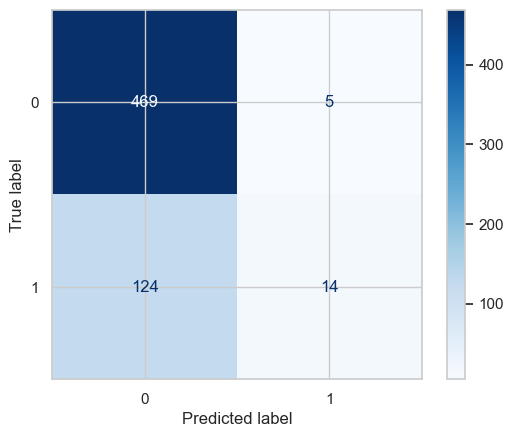

In [555]:
# Generate predictions on the training set
y_pred_train = accidents_RF.predict(X_train)

# Obtain the confusion matrix
cm = confusion_matrix(y_train, y_pred_train)

# Calculate false positive rate (FPR) and true positive rate (TPR)
fpr = cm[0, 1] / (cm[0, 0] + cm[0, 1])
tpr = cm[1, 1] / (cm[1, 0] + cm[1, 1])
precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=accidents_RF.classes_).plot(cmap='Blues')

# Display FPR and TPR
print(f"False Positive Rate: {fpr:.4f}")
print(f"True Positive Rate: {tpr:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Accuracy: {accidents_RF.score(X_train, y_train):.4f}")

In [543]:
#determining feature importance

np.argmax(accidents_RF.oob_decision_function_,axis=1)
print(pd.DataFrame(accidents_RF.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance', ascending=False))

                                           importance
Distance.mi.                                 0.113573
Humidity...                                  0.107578
Temperature.F.                               0.105133
Wind_Chill.F.                                0.102695
Pressure.in.                                 0.094210
Wind_Speed.mph.                              0.067281
Visibility.mi.                               0.031068
Weather_Condition_Fair                       0.029447
Sunrise_Sunset_Day                           0.023333
Sunrise_Sunset_Night                         0.023060
Side_R                                       0.022356
Astronomical_Twilight_Day                    0.022288
Civil_Twilight_Day                           0.022008
Civil_Twilight_Night                         0.021973
Nautical_Twilight_Day                        0.021844
Astronomical_Twilight_Night                  0.021143
Wind_Direction_CALM                          0.020997
Side_L                      